In [1]:
import pandas as pd

In [3]:
indicators_df = pd.read_csv('./indicators.csv')
indicators_df = indicators_df[1:]
indicators_df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,"Egypt, Arab Rep.",EGY,2008,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,103188
2,"Egypt, Arab Rep.",EGY,2007,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,102584
3,"Egypt, Arab Rep.",EGY,2006,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,100317
4,"Egypt, Arab Rep.",EGY,2005,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,98051
5,"Egypt, Arab Rep.",EGY,2004,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,96265


In [4]:
indicators_df.drop_duplicates(keep='first', inplace=True)

indicators_df.reset_index()

,index,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,1,"Egypt, Arab Rep.",EGY,2008,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,103188
1,2,"Egypt, Arab Rep.",EGY,2007,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,102584
2,3,"Egypt, Arab Rep.",EGY,2006,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,100317
3,4,"Egypt, Arab Rep.",EGY,2005,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,98051
4,5,"Egypt, Arab Rep.",EGY,2004,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,96265
...,...,...,...,...,...,...,...
82042,94216,"Egypt, Arab Rep.",EGY,1974,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,104898931.8
82043,94217,"Egypt, Arab Rep.",EGY,1973,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,21799938.7
82044,94218,"Egypt, Arab Rep.",EGY,1972,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,11127695.3
82045,94219,"Egypt, Arab Rep.",EGY,1971,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,20632940.1


In [5]:
indicators_df = pd.pivot_table(indicators_df, values='Value', index='Year', columns='Indicator Name', aggfunc='first')
indicators_df.shape

(67, 4296)

In [6]:
EGY_df = pd.read_csv('./api.csv', skiprows=4)
EGY_df.head()
EGY_df.shape

(1431, 65)

In [7]:
EGY_df.drop_duplicates(keep='first', inplace=True)
EGY_df.reset_index()


EGY_df = EGY_df.T

column_names = EGY_df.loc['Indicator Name', :].tolist()

len(column_names)

1431

In [8]:
EGY_df = EGY_df.iloc[4:-1, :]
EGY_df.columns = column_names

In [9]:
df = pd.merge(indicators_df, EGY_df, left_index=True, right_index=True, how='inner')
df.index.names = ['Year']

In [10]:
df = df[[s for s in df.columns if "co2" in s.lower()]]

df.columns = [s.split('_')[0] for s in df.columns]
df = df.loc[:,~df.columns.duplicated()]

df.dropna(subset=['CO2 emissions (metric tons per capita)', 
                  'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
                  'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], inplace=True)

df = df[1:]

In [11]:
from sklearn import preprocessing

df.reset_index(inplace=True)
values = df.values[:, 1:]
years = df.values[:, 0]
column_names = df.columns[1:]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(values)
df = pd.DataFrame(x_scaled, index=years)
df.columns = column_names

<IPython.core.display.Javascript object>


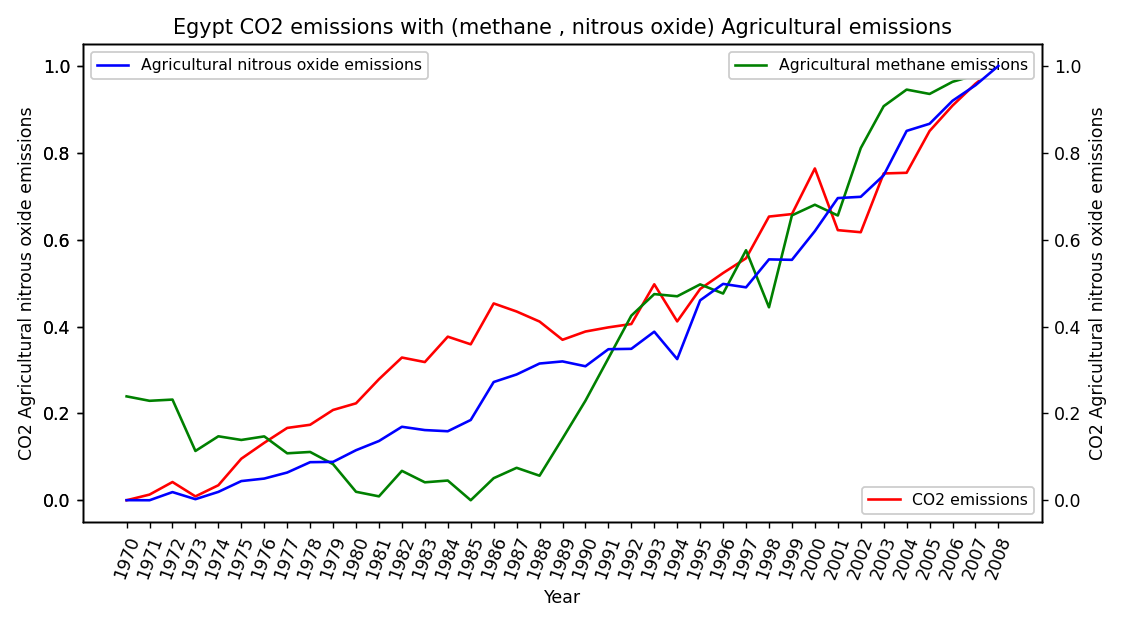

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

plt.rcParams["axes.grid"] = False

fig, ax1 = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(9)

plt.setp(ax1.get_xticklabels(), rotation=70) 

ax1.plot(df['CO2 emissions (metric tons per capita)'],
         'r',
         label = 'CO2 emissions')

ax1.set_xlabel('Year')
ax1.legend(loc='lower right', 
           fontsize=9, 
           frameon=True, 
           framealpha=1)

ax2 = ax1.twinx()
ax2.plot(df['Agricultural methane emissions (thousand metric tons of CO2 equivalent)'],         
         'g',
         label = 'Agricultural methane emissions')

ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
ax2.set_ylabel('CO2 Agricultural nitrous oxide emissions')
ax2.legend(loc='upper right', 
           fontsize=9, 
           frameon=True, 
           framealpha=1)

ax3 = ax1.twinx()
ax3.plot(df['Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], 
         'b', 
         label='Agricultural nitrous oxide emissions')

ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_ylabel('CO2 Agricultural nitrous oxide emissions')
ax3.tick_params('y')
ax3.legend(loc='upper left', 
           fontsize=9, 
           frameon=True, 
           framealpha=1)


plt.title('Egypt CO2 emissions with (methane , nitrous oxide) Agricultural emissions')
fig.tight_layout()
plt.show()